In this notebook we will show how to perform a Granger Causality analysis, and demonstrate how poorly it performs on our simulated data.

In [1]:
import os,sys
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools

from brainnetworks.dcm_sim import sim_dcm_dataset

from brainnetworks.graph_utils import show_graph_from_adjmtx,show_graph_from_pattern

# first we simulate some data using our DCM model, with the same HRF across all regions

_,data_conv,params=sim_dcm_dataset(verbose=True)

A=params['A']
B=params['B']
C=params['C']

data=data_conv[range(0,data_conv.shape[0],int(1./params['stepsize']))]


A
[[-1.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.]
 [ 0.  1.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.]]
B
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
C
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]


Now compute Granger causality across all pairs of timeseries

In [2]:
gc=numpy.zeros(A.shape)
for i in range(A.shape[0]):
    for j in range(A.shape[0]):
        if i==j:  # don't compute self-connectivity
            continue
        result=statsmodels.tsa.stattools.grangercausalitytests(data[:,[i,j]],1)
        if result[1][0]['params_ftest'][1]<0.05:
            gc[i,j]=1
        


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.0039  , p=0.0149  , df_denom=296, df_num=1
ssr based chi2 test:   chi2=6.0647  , p=0.0138  , df=1
likelihood ratio test: chi2=6.0041  , p=0.0143  , df=1
parameter F test:         F=6.0039  , p=0.0149  , df_denom=296, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6339  , p=0.0576  , df_denom=296, df_num=1
ssr based chi2 test:   chi2=3.6708  , p=0.0554  , df=1
likelihood ratio test: chi2=3.6484  , p=0.0561  , df=1
parameter F test:         F=3.6339  , p=0.0576  , df_denom=296, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.7668  , p=0.0020  , df_denom=296, df_num=1
ssr based chi2 test:   chi2=9.8658  , p=0.0017  , df=1
likelihood ratio test: chi2=9.7065  , p=0.0018  , df=1
parameter F test:         F=9.7668  , p=0.0020  , df_denom=296, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.5477  , p=0.0110  

[(1, 0), (3, 0), (3, 2), (4, 0)]
Black: input
Red: unmodulated


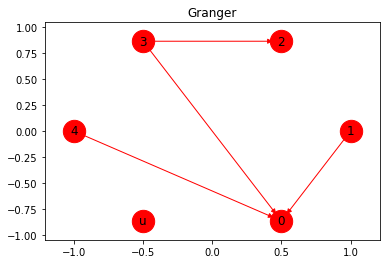

[(1, 2), (1, 3), ('u', 0), (0, 2), (0, 4)]
Black: input
Red: unmodulated
Blue: modulated


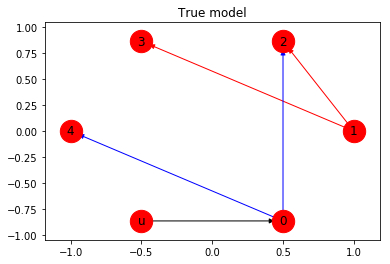

In [3]:
show_graph_from_adjmtx(gc,numpy.zeros(B.shape),numpy.zeros(C.shape),title='Granger')
show_graph_from_adjmtx(A,B,C,title='True model')


Exercise: Try running this notebook a few times, and watch how the GC results vary from run to run.